# Data Processing

Julian Domingo - jad5348

This file contains all transformation / feature engineering techniques used to fit the various base learners fed to my meta learner.

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, probplot
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# ignore warnings (i.e. deprecation warnings)
import warnings
warnings.filterwarnings('ignore')

In [222]:
def write_data(file_name, data, is_train):
    if is_train:
        data.to_csv("./data/refined/train/{}".format(file_name), index=False)
    else:
        data.to_csv("./data/refined/test/{}".format(file_name), index=False)

In [223]:
def scatter_plot(data, ids):
    """ Displays a scatter plot of each feature's distribution of values."""
    for feature in data:
        plt.scatter(ids, data[feature])
        plt.title(feature)
        plt.show()

In [224]:
#histogram and normal probability plot
def display_hist_and_prob_plots(columns):
    for feature in columns:
        sns.distplot(x_train[feature], fit=norm);
        plt.title(feature)
        fig = plt.figure()
        res = probplot(x_train[feature], plot = plt)
        plt.show()

In [225]:
def get_train_test_copy(train, test):
    return train.copy(deep = True), test.copy(deep = True)

In [226]:
train = pd.read_csv("data/raw/train.csv", index_col=0)
test = pd.read_csv("data/raw/test.csv", index_col=0)

In [227]:
train.head()

,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,1,38733,61385,0,38,118751,1000,32020,1,121980,...,1,118830,1,1,126461,1,46871,NaN,NaN,NaN
2,1,34248,51329,0,41,120800,1000,130630,1,124029,...,1,118832,1,1,130296,1,42386,NaN,NaN,NaN
3,1,15830,5522,0,50,118779,1000,303218,2,122006,...,1,118832,1,2,127063,1,23968,NaN,NaN,NaN
4,1,19417,6754,0,45,123163,2000,19024,1,126391,...,1,118832,1,1,15274,1,27555,NaN,NaN,NaN
5,1,42122,16991,0,41,119193,1000,303218,1,122422,...,1,118832,1,1,133491,1,50260,NaN,NaN,NaN


In [228]:
train.isnull().sum()

Y          0
F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21        0
F22        0
F23        0
F24        0
F25    16383
F26    16383
F27    16383
dtype: int64

Clearly, we can remove **F25**, **F26**, and **F27** from our data set.

In [229]:
drop_columns = ["F25", "F26", "F27"]

# axis = 1 indicates drop from column, 0 would be row
train.drop(drop_columns, axis = 1, inplace = True)

In [230]:
write_data("train_raw.csv", train, is_train=True)
write_data("test_raw.csv", test, is_train=False)

In [198]:
def display_pearson_correlation_matrix(train):
    colormap = plt.cm.RdBu
    plt.figure(figsize=(24,24))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()

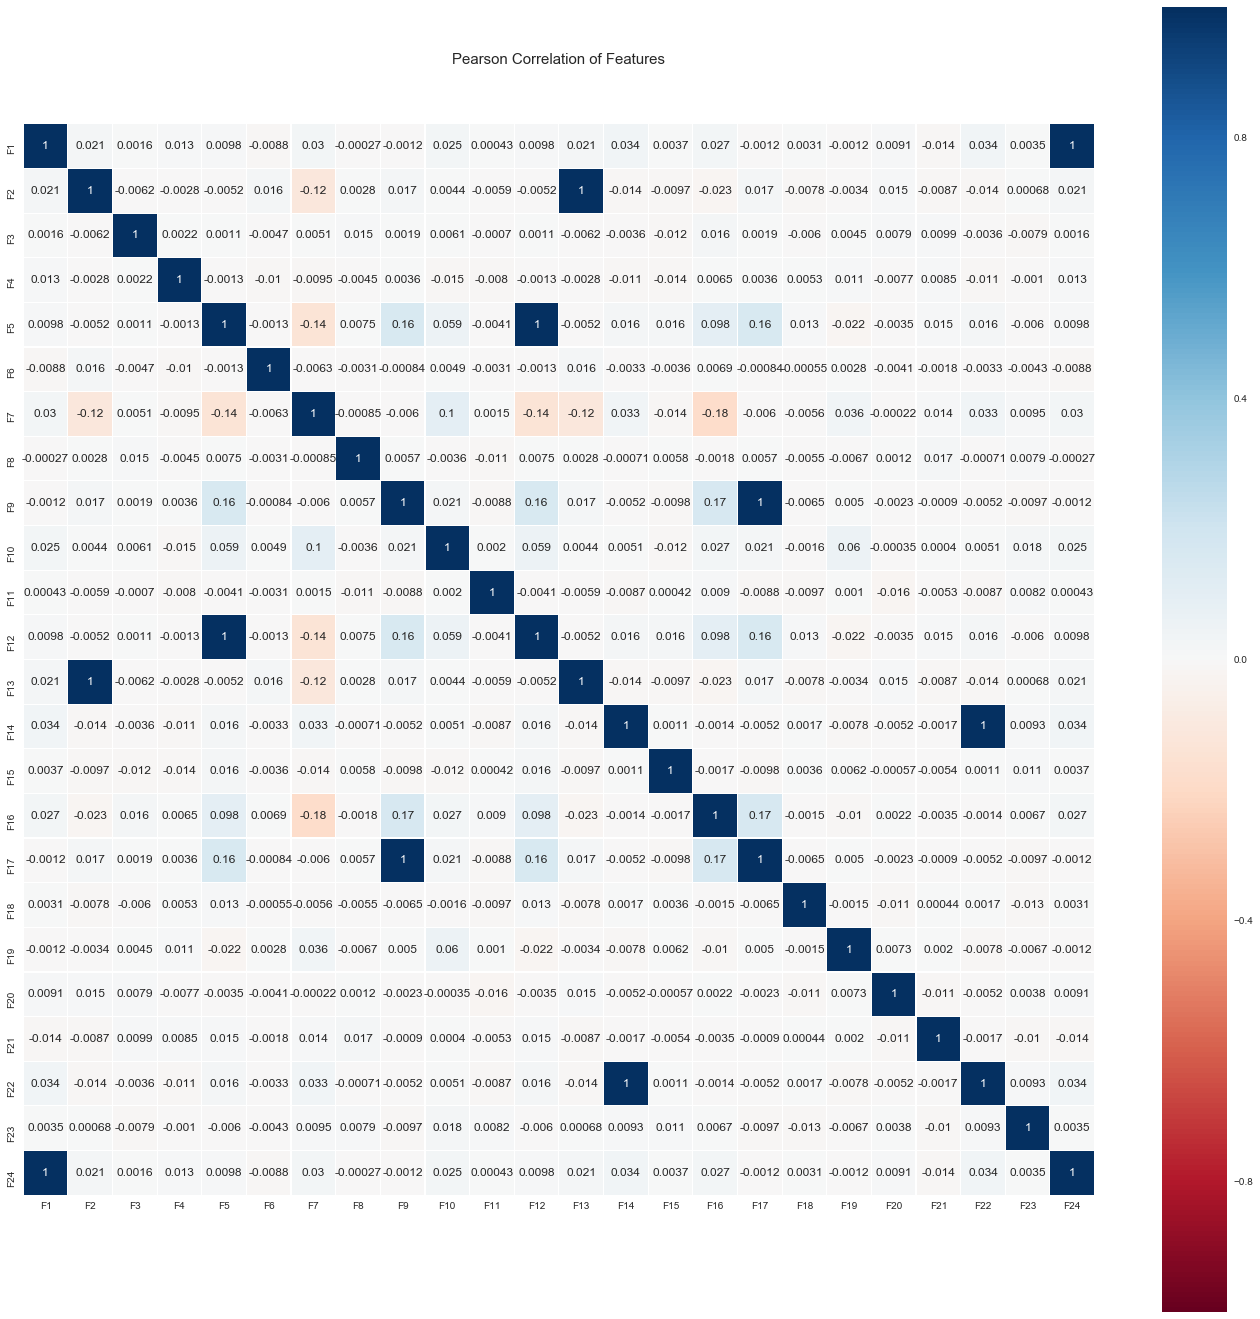

In [199]:
display_pearson_correlation_matrix(train.drop(["Y"], axis = 1))

From viewing the Pearson correlation matrix, it's clear some of the features are linearly depenedent of another feature due to their correlation of precisely 1 (obviously excluding the diagonal); we should remove one of them to reduce unneeded complexity to our data.

In [200]:
# remove repeat features
lin_dependent_features = ["F1", "F2", "F5", "F9", "F14"]

train.drop(lin_dependent_features, axis = 1, inplace = True)
test.drop(lin_dependent_features, axis = 1, inplace = True)

### Transformations

In [201]:
# None (except with feature selection techniques used above); used as baseline data.
write_data("train_base.csv", train, is_train=True)
write_data("test_base.csv", test, is_train=False)

In [202]:
# Log(x + 1) transform
train_log, test_log = get_train_test_copy(train, test)

for feature in train_log:
    if feature != "Y":
        train_log[feature] = np.log(train_log[feature] + 1)

for feature in test_log:
    test_log[feature] = np.log(test_log[feature] + 1)
    
write_data("train_log.csv", train_log, is_train=True)
write_data("test_log.csv", test_log, is_train=False)

In [203]:
train_log.head()

,Y,F3,F4,F6,F7,F8,F10,F11,F12,F13,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,
1,1,0.0,3.663562,6.908755,10.374147,0.693147,11.759473,0.693147,11.696862,11.030736,0.693147,11.693228,11.687727,0.693147,11.685458,0.693147,0.693147,11.747697,0.693147,10.755176
2,1,0.0,3.737670,6.908755,11.780132,0.693147,11.762462,1.098612,11.713766,10.852962,0.693147,11.835813,11.704785,0.693147,11.685474,0.693147,0.693147,11.777572,0.693147,10.654597
3,1,0.0,3.931826,6.908755,12.622211,1.098612,11.762127,0.693147,11.697095,8.679312,0.693147,11.693395,11.687945,0.693147,11.685474,0.693147,1.098612,11.752446,0.693147,10.084517
4,1,0.0,3.828641,7.601402,9.853509,0.693147,11.759543,0.693147,11.732912,8.869539,1.098612,12.508537,11.724094,0.693147,11.685474,0.693147,0.693147,9.633973,0.693147,10.223976
5,1,0.0,3.737670,6.908755,12.622211,0.693147,11.762127,0.693147,11.700533,9.761290,0.693147,11.693395,11.691431,0.693147,11.685474,0.693147,0.693147,11.801797,0.693147,10.824985


In [204]:
test_log.head()

,F3,F4,F6,F7,F8,F10,F11,F12,F13,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,
16384,0.000000,3.526361,9.741027,11.870761,0.693147,11.851838,0.693147,11.711948,11.818600,0.693147,11.761105,11.705832,0.693147,11.712473,0.693147,0.693147,11.757416,0.693147,10.494879
16385,0.000000,3.663562,9.798183,12.661971,0.693147,11.835378,0.693147,11.707727,10.915325,0.693147,11.708895,11.701594,0.693147,11.692777,0.693147,1.098612,11.755417,0.693147,11.414022
16386,0.693147,3.332205,6.908755,11.870110,0.693147,11.834726,0.693147,11.709396,10.078910,0.693147,12.658265,11.703265,0.693147,11.692777,0.693147,0.693147,11.752179,0.693147,10.738330
16387,0.000000,3.526361,7.601402,11.776727,0.693147,11.760496,0.693147,11.697636,11.434023,0.693147,11.850433,12.105993,0.693147,11.686559,0.693147,0.693147,11.759582,0.693147,11.328269
16388,0.000000,3.713572,7.601402,11.791103,0.693147,11.760192,0.693147,11.835415,9.049467,0.693147,11.708846,11.827459,0.693147,11.685474,0.693147,0.693147,11.751375,0.693147,11.433687


In [205]:
# StandardScaler transform
train_scaled, test_scaled = get_train_test_copy(train, test)

for feature in train_scaled:
    if feature != "Y":
        train_scaled[feature] = StandardScaler().fit_transform(train_scaled[feature].values.reshape(-1, 1))
    
for feature in test_scaled:
    test_scaled[feature] = StandardScaler().fit_transform(test_scaled[feature].values.reshape(-1, 1))
    
write_data("train_scaled.csv", train_scaled, is_train=True)
write_data("test_scaled.csv", test_scaled, is_train=False)

In [206]:
train_scaled.head()

,Y,F3,F4,F6,F7,F8,F10,F11,F12,F13,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,
1,1,-0.174001,-0.400691,-0.046879,-1.684821,-0.173416,-0.742600,-0.170802,-0.394364,0.989123,-0.166718,-0.760193,-0.276906,-0.165442,0.056362,-0.173744,-0.161232,-0.059196,-0.171408,-0.160254
2,1,-0.174001,0.199448,-0.046879,-0.705864,-0.173416,-0.685306,3.444513,-0.041259,0.707771,-0.166718,-0.495634,-0.211104,-0.165442,0.056544,-0.173744,-0.161232,0.142314,-0.171408,-0.289080
3,1,-0.174001,1.999866,-0.046879,1.007515,3.839408,-0.691738,-0.170802,-0.389539,-0.573842,-0.166718,-0.759905,-0.276071,-0.165442,0.056544,-0.173744,3.564378,-0.027564,-0.171408,-0.818116
4,1,-0.174001,0.999634,-0.037987,-1.813839,-0.173416,-0.741254,-0.170802,0.365957,-0.539372,3.470219,1.414747,-0.135251,-0.165442,0.056544,-0.173744,-0.161232,-5.901498,-0.171408,-0.715084
5,1,-0.174001,0.199448,-0.046879,1.007515,-0.173416,-0.691738,-0.170802,-0.318194,-0.252956,-0.166718,-0.759905,-0.262711,-0.165442,0.056544,-0.173744,-0.161232,0.310194,-0.171408,-0.062909


In [207]:
test_scaled.head()

,F3,F4,F6,F7,F8,F10,F11,F12,F13,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,
16384,-0.182616,-1.411235,-0.006004,-0.581213,-0.174905,1.096440,-0.163607,-0.086340,3.029266,-0.170647,-0.648103,-0.206570,-0.164644,0.358195,-0.167183,-0.169378,0.015616,-0.165145,-0.490842
16385,-0.182616,-0.406434,-0.005825,1.132160,-0.174905,0.761930,-0.163607,-0.174953,0.793470,-0.170647,-0.741702,-0.223143,-0.164644,0.136576,-0.167183,3.829562,0.002118,-0.165145,1.133204
16386,3.871798,-2.616997,-0.008869,-0.582136,-0.174905,0.748789,-0.163607,-0.139956,-0.069879,-0.170647,2.024661,-0.216617,-0.164644,0.136576,-0.167183,-0.169378,-0.019691,-0.165145,-0.193818
16387,-0.182616,-1.411235,-0.008690,-0.708711,-0.174905,-0.692334,-0.163607,-0.385279,1.829112,-0.170647,-0.476180,1.721408,-0.164644,0.067511,-0.167183,-0.169378,0.030279,-0.165145,0.911189
16388,-0.182616,-0.004513,-0.008690,-0.689988,-0.174905,-0.698028,-0.163607,2.678072,-0.494132,-0.170647,-0.741788,0.300172,-0.164644,0.055504,-0.167183,-0.169378,-0.025091,-0.165145,1.186859


For determining which features to transform, we'll fit a RandomForestClassifier on the baseline data set, then pick the top features which Random Forest deems as most important. 

Running a lone RandomForestClassifier on the base data places highest importance on **F13** and **F24**. We'll appropriately gather features from a polynomial of degree 2, generating $2^{(degree + 1)}$ features.

In [208]:
# Polynomial transform
train_poly, test_poly = get_train_test_copy(train, test)

# Train
features = train_poly[["F24", "F13"]]
pf = PolynomialFeatures(degree = 2, interaction_only = False)

# Don't add the feature of all 1's
poly_features = pf.fit_transform(features)[:,1:]
poly_features = pd.DataFrame(poly_features)

# Shift row index to match train set, rename columns
poly_features.index = np.arange(1, len(poly_features) + 1)
poly_features = poly_features.rename(columns={0: "poly_f24", 1: "poly_f13", 2: "poly_f24*f13", \
                                              3: "poly_f24^2", 4: "poly_f13^2"})
train_poly = pd.concat([train_poly, poly_features], axis=1)

################################################################################################

# Test
features = test_poly[["F24", "F13"]]
pf = PolynomialFeatures(degree = 2, interaction_only = False)

# Don't add the feature of all 1's
poly_features = pf.fit_transform(features)[:,1:]
poly_features = pd.DataFrame(poly_features)

# Shift row index to match test set, rename columns
poly_features.index = np.arange(16384, len(poly_features) + 16384)
poly_features = poly_features.rename(columns={0: "poly_f24", 1: "poly_f13", 2: "poly_f24*f13", \
                                              3: "poly_f24^2", 4: "poly_f13^2"})
test_poly = pd.concat([test_poly, poly_features], axis=1)
    
write_data("train_poly.csv", train_poly, is_train=True)
write_data("test_poly.csv", test_poly, is_train=False)

In [209]:
train_poly.head()

,Y,F3,F4,F6,F7,F8,F10,F11,F12,F13,...,F20,F21,F22,F23,F24,poly_f24,poly_f13,poly_f24*f13,poly_f24^2,poly_f13^2
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,38,1000,32020,1,127959,1,120193,61742,...,1,1,126461,1,46871,46871.0,61742.0,2.196891e+09,2.893909e+09,3.812075e+09
2,1,0,41,1000,130630,1,128342,2,122242,51686,...,1,1,130296,1,42386,42386.0,51686.0,1.796573e+09,2.190763e+09,2.671443e+09
3,1,0,50,1000,303218,2,128299,1,120221,5879,...,1,2,127063,1,23968,23968.0,5879.0,5.744650e+08,1.409079e+08,3.456264e+07
4,1,0,45,2000,19024,1,127968,1,124605,7111,...,1,1,15274,1,27555,27555.0,7111.0,7.592780e+08,1.959436e+08,5.056632e+07
5,1,0,41,1000,303218,1,128299,1,120635,17348,...,1,1,133491,1,50260,50260.0,17348.0,2.526068e+09,8.719105e+08,3.009531e+08


In [210]:
test_poly.head()

,F3,F4,F6,F7,F8,F10,F11,F12,F13,F15,...,F20,F21,F22,F23,F24,poly_f24,poly_f13,poly_f24*f13,poly_f24^2,poly_f13^2
id,,,,,,,,,,,,,,,,,,,,,
16384,0,33,17000,143022,1,140341,1,122020,135753,1,...,1,1,127696,1,36129,36129.0,135753.0,1.305305e+09,4.904620e+09,1.842888e+10
16385,0,38,18000,315517,1,138050,1,121506,55012,1,...,1,2,127441,1,90582,90582.0,55012.0,8.205099e+09,4.983097e+09,3.026320e+09
16386,1,27,1000,142929,1,137960,1,121709,23834,1,...,1,1,127029,1,46088,46088.0,23834.0,2.124104e+09,1.098461e+09,5.680596e+08
16387,0,33,2000,130186,1,128090,1,120286,92412,1,...,1,1,127973,1,83138,83138.0,92412.0,6.911927e+09,7.682949e+09,8.539978e+09
16388,0,40,2000,132071,1,128051,1,138055,8513,1,...,1,1,126927,1,92381,92381.0,8513.0,8.534249e+09,7.864395e+08,7.247117e+07
